In [1]:
# Import necessary libraries
import vaex
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load datasets using Vaex
dataset_failure = vaex.open("D:/SIXTH SEMESTER/IP/important/final_dataset.xlsx")
dataset_normal = vaex.open("D:/SIXTH SEMESTER/IP/important/final_normal.xlsx")

# Preprocess the datasets
# For example: Handle missing values, balance the dataset

# Train-test split
X_failure = dataset_failure[['a_x', 'a_y', 'a_z']]  # Features
y_failure = dataset_failure['failure']  # Target variable

X_normal = dataset_normal[['a_x', 'a_y', 'a_z']]  # Features
y_normal = dataset_normal['failure']  # Target variable

X_train_failure, X_test_failure, y_train_failure, y_test_failure = train_test_split(X_failure, y_failure, test_size=0.2, random_state=42)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.2, random_state=42)

# Combine datasets after train-test split
X_train = vaex.concat([X_train_failure, X_train_normal])
y_train = vaex.concat([y_train_failure, y_train_normal])
X_test = vaex.concat([X_test_failure, X_test_normal])
y_test = vaex.concat([y_test_failure, y_test_normal])

# Define and train a classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train.to_pandas(), y_train.to_numpy())

# Evaluate the model
y_pred = model.predict(X_test.to_pandas())
accuracy = accuracy_score(y_test.to_numpy(), y_pred)
print("Accuracy:", accuracy)

# Make predictions on new data
# You can use the trained model to make predictions on new data if needed


ModuleNotFoundError: No module named 'vaex'

In [2]:
!pip install vaex

  Obtaining dependency information for vaex from https://files.pythonhosted.org/packages/17/4d/e42547bc4d263bd15fb3c097f3f5510ec4752766d4ee32d80db58898f70b/vaex-4.17.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
      --------------------------------------- 0.1/2.5 MB 1.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.1/2.5 MB 1.4 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.5 MB 1.8 MB/s eta 0:00:02
     ------ --------------------------------- 0.4/2.5 MB 2.2 MB/s eta 0:00:01
     -------- ------------------------------- 0.5/2.5 MB 2.3 MB/s eta 0:00:01
     ----------- ---------------------------- 0.7/2.5 MB 2.6 MB/s eta 0:00:01
     ------------- -------------------------- 0.8/2.5 MB 2.6 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.5 MB 2.6 MB/s eta 0:00:01
     ---------------- ------------------

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [328 lines of output]
  <string>:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\vaex
  copying vaex\agg.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\array_types.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\asyncio.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\benchmark.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\cache.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\column.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\config.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\convert.py -> build\lib.win-amd64-cpython-311\vaex
  copying vaex\cpu.py -> build\lib.win-amd64-cpyt

In [3]:
$ pip install vaex

SyntaxError: invalid syntax (1108809818.py, line 1)

In [4]:
$pip install vaex

SyntaxError: invalid syntax (1073526124.py, line 1)

In [5]:
python --version


NameError: name 'python' is not defined

In [6]:
import sys
sys.version


'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [7]:
import vaex
print(vaex.__version__)


ModuleNotFoundError: No module named 'vaex'

In [8]:
pip install dask


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install dask distributed


Note: you may need to restart the kernel to use updated packages.


In [10]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load the imbalanced dataset
df_imbalanced = dd.read_excel("D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")

# Load the normal dataset
df_normal = dd.read_excel("D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)

# Alternatively, you can select a subset of columns
# For example:
# df_imbalanced_pruned = df_imbalanced[['a_x', 'a_y', 'a_z', 'failure']]
# df_normal_pruned = df_normal[['a_x', 'a_y', 'a_z', 'failure']]
# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled])

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)
# Make predictions
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test.compute(), y_pred.compute())
print("Accuracy:", accuracy)


ModuleNotFoundError: No module named 'dask_ml'

In [11]:
pip install dask-ml


  Obtaining dependency information for dask-ml from https://files.pythonhosted.org/packages/9e/9d/e1116855b1ba9ed40e11b53be18ffc55113dc3d06fc9330570e9636f6350/dask_ml-2024.3.20-py3-none-any.whl.metadata
  Obtaining dependency information for dask-glm>=0.2.0 from https://files.pythonhosted.org/packages/8a/8e/cd1502dd2d00d54fb3e10880d4c8cb6699320a239da7a39c9f55044afdee/dask_glm-0.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for sparse>=0.7.0 from https://files.pythonhosted.org/packages/07/a3/22e031f6833d84edd54b0809087d910907358bddc1c92e56b7b2db30f5ed/sparse-0.15.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/148.9 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/148.9 kB 991.0 kB/s eta 0:00:01
   --------------------------------- ------ 122.9/148.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 148.9/148.9 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:

In [18]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)

# Alternatively, you can select a subset of columns
# For example:
# df_imbalanced_pruned = df_imbalanced[['a_x', 'a_y', 'a_z', 'failure']]
# df_normal_pruned = df_normal[['a_x', 'a_y', 'a_z', 'failure']]
# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled])

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)
# Make predictions
y_pred = clf.predict(X_test_scaled)

# Convert Dask arrays to NumPy arrays
X_test_scaled_np = X_test_scaled.compute()
y_test_np = y_test.compute()

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 1.0
Accuracy: 100.0


In [20]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred contains the predicted labels and y_test contains the true labels
conf_matrix = confusion_matrix(y_test_np, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5066    0]
 [   0 4982]]


In [22]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)

# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled])

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert Dask arrays to NumPy arrays
X_train_np = X_train_scaled.compute()
X_test_np = X_test_scaled.compute()
y_train_np = y_train.compute()

# Initialize the Support Vector Machine classifier
clf = SVC()

# Train the classifier
clf.fit(X_train_np, y_train_np)

# Make predictions
y_pred = clf.predict(X_test_np)

# Calculate accuracy
accuracy = accuracy_score(y_test.compute(), y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)



Accuracy: 1.0
Accuracy: 100.0


ValueError: Invalid parameter 'max_depth' for estimator BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100). Valid parameters are: ['base_estimator', 'bootstrap', 'bootstrap_features', 'estimator', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [1]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)

# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled])

# Convert Dask DataFrame to pandas DataFrame
df_combined = df_combined.compute()

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Train model on training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model on training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate model on validation data
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)



Training Accuracy: 1.0
Validation Accuracy: 1.0


In [7]:
import pandas as pd
import dask.dataframe as dd
import pickle
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from dask_ml.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Load additional datasets with failure labeled as 2 and 3
df_failure2_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_horiz_alignment.xlsx")
df_failure2 = dd.from_pandas(df_failure2_pandas, npartitions=10)

df_failure3_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_vertical_alignment.xlsx")
df_failure3 = dd.from_pandas(df_failure3_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)
df_failure2_sampled = df_failure2.sample(frac=0.1, random_state=42)
df_failure3_sampled = df_failure3.sample(frac=0.1, random_state=42)

# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0
df_failure2_sampled['label'] = 2
df_failure3_sampled['label'] = 3

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled, df_failure2_sampled, df_failure3_sampled])

# Drop the 'failure' feature from the combined dataset
df_combined = df_combined.drop('failure', axis=1)

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('feature_selection', SelectFromModel(RandomForestClassifier())),
                      ('dimensionality_reduction', PCA()),
                      ('classifier', RandomForestClassifier(random_state=42))])

# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20]
}

# Perform cross-validation using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test.compute(), y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

# Load the saved model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


Accuracy: 0.6315763026983569
Accuracy: 63.157630269835686


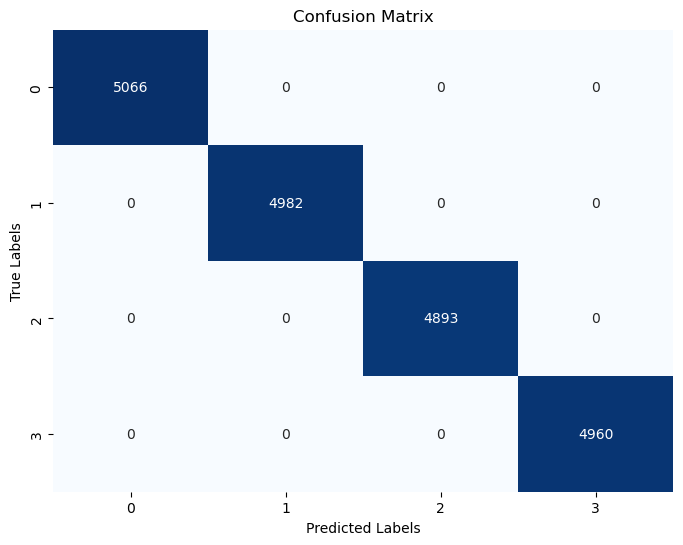

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [5]:
num_features = X.shape[1]
print("Number of features:", num_features)
# Get the names of the features
feature_names = X.columns.tolist()

# Print the names of the features
print("Feature Names:", feature_names)


Number of features: 4
Feature Names: ['a_x', 'a_y', 'a_z', 'failure']


In [11]:
import pandas as pd
import dask.dataframe as dd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Load additional datasets with failure labeled as 2 and 3
df_failure2_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_horiz_alignment.xlsx")
df_failure2 = dd.from_pandas(df_failure2_pandas, npartitions=10)

df_failure3_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_vertical_alignment.xlsx")
df_failure3 = dd.from_pandas(df_failure3_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)
df_failure2_sampled = df_failure2.sample(frac=0.1, random_state=42)
df_failure3_sampled = df_failure3.sample(frac=0.1, random_state=42)

# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0
df_failure2_sampled['label'] = 2
df_failure3_sampled['label'] = 3

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled, df_failure2_sampled, df_failure3_sampled])

# Drop the 'failure' feature from the combined dataset
df_combined = df_combined.drop('failure', axis=1)

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Convert Dask DataFrame to pandas DataFrame
X = X.compute()
y = y.compute()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
clf = SVC(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

# Save the model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(clf, f)


Accuracy: 0.84725
Accuracy: 84.725


In [13]:
import pandas as pd
import dask.dataframe as dd
import pickle
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Load additional datasets with failure labeled as 2 and 3
df_failure2_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_horiz_alignment.xlsx")
df_failure2 = dd.from_pandas(df_failure2_pandas, npartitions=10)

df_failure3_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_vertical_alignment.xlsx")
df_failure3 = dd.from_pandas(df_failure3_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)
df_failure2_sampled = df_failure2.sample(frac=0.1, random_state=42)
df_failure3_sampled = df_failure3.sample(frac=0.1, random_state=42)

# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0
df_failure2_sampled['label'] = 2
df_failure3_sampled['label'] = 3

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled, df_failure2_sampled, df_failure3_sampled])

# Drop the 'failure' feature from the combined dataset
df_combined = df_combined.drop('failure', axis=1)

# Convert Dask DataFrame to pandas DataFrame
df_combined = df_combined.compute()

# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
clf = SVC(random_state=42)

# Perform cross-validation using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

# Save the best model
with open('best_model_svm.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

# Load the saved model
with open('best_model_svm.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


KeyboardInterrupt: 

In [1]:
import pandas as pd
import dask.dataframe as dd
import pickle
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from dask_ml.model_selection import GridSearchCV

# Load the imbalanced dataset
df_imbalanced_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_dataset.xlsx")
df_imbalanced = dd.from_pandas(df_imbalanced_pandas, npartitions=10)  # Adjust npartitions as needed

# Load the normal dataset
df_normal_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_normal.xlsx")
df_normal = dd.from_pandas(df_normal_pandas, npartitions=10)

# Load additional datasets with failure labeled as 2 and 3
df_failure2_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_horiz_alignment.xlsx")
df_failure2 = dd.from_pandas(df_failure2_pandas, npartitions=10)

df_failure3_pandas = pd.read_excel(r"D:\SIXTH SEMESTER\IP\important\final_vertical_alignment.xlsx")
df_failure3 = dd.from_pandas(df_failure3_pandas, npartitions=10)

# Sample the data
df_imbalanced_sampled = df_imbalanced.sample(frac=0.1, random_state=42)
df_normal_sampled = df_normal.sample(frac=0.1, random_state=42)
df_failure2_sampled = df_failure2.sample(frac=0.1, random_state=42)
df_failure3_sampled = df_failure3.sample(frac=0.1, random_state=42)

# Add a label column to distinguish between normal and failure samples
df_imbalanced_sampled['label'] = 1
df_normal_sampled['label'] = 0
df_failure2_sampled['label'] = 2
df_failure3_sampled['label'] = 3

# Concatenate the datasets
df_combined = dd.concat([df_imbalanced_sampled, df_normal_sampled, df_failure2_sampled, df_failure3_sampled])

# Drop the 'failure' feature from the combined dataset
df_combined = df_combined.drop('failure', axis=1)
# Remove the first row (index 0) from the DataFrame
# Remove the first row (index 0) from the DataFrame
df_combined = df_combined.loc[df_combined.index != 0]


# Split the data into features (X) and labels (y)
X = df_combined.drop('label', axis=1)
y = df_combined['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Perform cross-validation using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_clf.predict(X_test_scaled)

# Convert Dask arrays to NumPy arrays
X_test_scaled_np = X_test_scaled.compute()
y_test_np = y_test.compute()

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

# Load the saved model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
# Save the scaler object
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the scaler object
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


Accuracy: 0.9132706899150796
Accuracy: 91.32706899150797
